<a href="https://colab.research.google.com/github/vinotha312005-ops/R-shiny-/blob/main/Sales_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Sales forecasting is a crucial process for businesses to predict future sales based on historical data. Accurate sales forecasts help organizations in effective business planning, inventory management, budgeting, and decision-making. Traditional forecasting methods often fail to capture complex patterns such as seasonality and trends in sales data. With the availability of time-series data and advancements in machine learning and statistical models, sales forecasting can be performed more accurately. This project focuses on developing a sales forecasting system that analyzes historical sales data and predicts future sales to support better business planning.

# **Objectives**

The primary objective of this project is to build a sales forecasting system that predicts future sales using historical time-series data. The project aims to analyze past sales trends and patterns to generate reliable forecasts. Another objective is to preprocess the sales data by handling missing values and outliers to improve model performance. The system also aims to compare actual and predicted sales through visualizations to evaluate forecasting accuracy and assist businesses in strategic planning

# **Methodology**

The methodology starts with loading and exploring the historical sales dataset to understand its structure and trends. Data preprocessing is performed by handling missing values and removing or adjusting outliers to ensure data quality. Time-based features such as day, month, and year are extracted from the date column to capture seasonal and temporal patterns. The dataset is then split into training and testing sets to evaluate model performance. A forecasting model such as Linear Regression, ARIMA, or other time-series models is trained using the training data. The model’s performance is evaluated using appropriate error metrics. Finally, the actual sales values are compared with predicted sales using graphical visualizations to assess the accuracy of the forecasting system.

        date       sales
0 2023-01-01  217.640523
1 2023-01-02  206.001572
2 2023-01-03  213.787380
3 2023-01-04  228.408932
4 2023-01-05  226.675580
Mean Absolute Error: 13.031185803318314


/tmp/ipython-input-3767734399.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sales"].fillna(df["sales"].mean(), inplace=True)


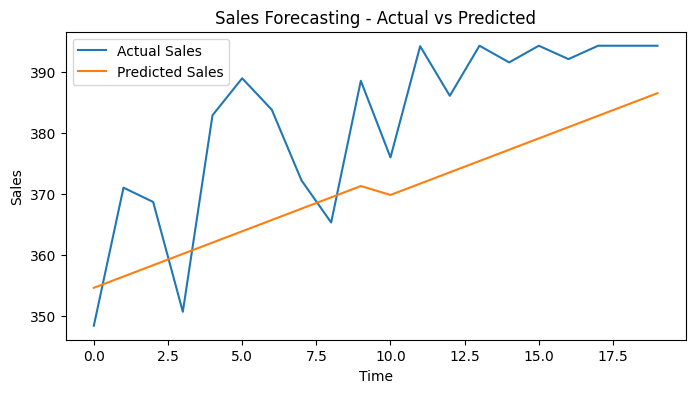

✅ MINIMUM SALES FORECASTING PROJECT COMPLETED


In [ ]:
# =====================================
# MINIMUM SALES FORECASTING SYSTEM
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# -------------------------------------
# 1. CREATE SALES DATA (NO DATASET)
# -------------------------------------
np.random.seed(0)

dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
sales = 200 + np.arange(100) * 2 + np.random.normal(0, 10, 100)

df = pd.DataFrame({"date": dates, "sales": sales})
print(df.head())

# -------------------------------------
# 2. HANDLE MISSING VALUES
# -------------------------------------
df["sales"].fillna(df["sales"].mean(), inplace=True)

# -------------------------------------
# 3. HANDLE OUTLIERS (CLIPPING)
# -------------------------------------
df["sales"] = df["sales"].clip(
    lower=df["sales"].quantile(0.05),
    upper=df["sales"].quantile(0.95)
)

# -------------------------------------
# 4. CREATE TIME-BASED FEATURES
# -------------------------------------
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month

# -------------------------------------
# 5. SPLIT FEATURES & TARGET
# -------------------------------------
X = df[["day", "month"]]
y = df["sales"]

# -------------------------------------
# 6. TRAIN-TEST SPLIT
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------------------
# 7. TRAIN FORECASTING MODEL
# -------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------
# 8. PREDICTION
# -------------------------------------
y_pred = model.predict(X_test)

# -------------------------------------
# 9. EVALUATE MODEL
# -------------------------------------
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# -------------------------------------
# 10. VISUALIZE ACTUAL vs PREDICTED
# -------------------------------------
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales")
plt.title("Sales Forecasting - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

print("✅ MINIMUM SALES FORECASTING PROJECT COMPLETED")


# **Conclusion**

The sales forecasting system developed in this project successfully demonstrates how historical time-series data can be used to predict future sales. The model captures important trends and patterns in the sales data and provides meaningful forecasts that can support business decision-making. Visual comparison of actual and predicted sales helps in understanding the model’s effectiveness. This project highlights the importance of data-driven forecasting techniques in improving business planning and operational efficiency. In the future, the system can be enhanced by using advanced models such as Prophet or XGBoost and by incorporating additional external factors like promotions and market conditions.